# 무신사 데이터 분석 및 머신러닝 프로젝트

##### 라이브러리 임포트

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
  
plt.style.use('seaborn')
sns.set(font_scale=2.5)

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# 데이터 읽기

In [3]:
df_train = pd.read_csv("musinsa_final.csv")
#df_train = df_train.sort_values("TOTAL_SELL", ascending=False)
#title컬럼을 기준으로 중복 값 제거
df_train = df_train.drop_duplicates(['TITLE'])
df_train

,index,TITLE,BRAND,SEASON,SEX,POPULARITY,BUCKET,TOTAL_SELL,LIKE_,REVIEW,SATISFACTION,DELIVERY_DATE,PRICE,SALE,CATEGORY_,IMG_URL
0,0,테이퍼드 히든 밴딩 크롭 슬랙스 [블랙]|TAPERED HIDDEN BANDING ...,MUSINSA STANDARD,2019ALL/,남,348380.0,28631.0,10000.0,12150.0,8845.0,94.0,2.0,31900.0,NaN,수트 팬츠/슬랙스,https://image.msscdn.net/images/goods_img/2019...
1,1,12/26 배송 캐시미어20 오버핏 더블 롱 코트 (블랙)|캐시미어20 오버핏 더블...,COOR,2019F/W/,남,170611.0,7235.0,3116.0,3617.0,2441.0,95.0,2.0,256800.0,20.0,겨울 기타 코트,https://image.msscdn.net/images/goods_img/2017...
2,2,Tydi crop jeans #0064|Tydi crop jeans #0064,FATALISM,2019F/W/,남,272331.0,16828.0,18525.0,10969.0,8960.0,94.0,2.0,86400.0,10.0,데님 팬츠,https://image.msscdn.net/images/goods_img/2017...
3,3,삼성 블루투스 이어폰 갤럭시버즈 SM-R170|삼성 블루투스 이어폰 갤럭시버즈 SM...,SAMSUNG ELECTRONICS,NaN,라이프,74163.0,7716.0,3305.0,1712.0,909.0,96.0,2.0,159500.0,NaN,이어폰,https://image.msscdn.net/images/goods_img/2019...
4,4,공용 알래스카 에어 프리미엄 푸퍼 점퍼 _ PHZ4JP3220GR|공용 알래스카 에...,POLHAM,2019F/W/,남,206928.0,6086.0,2286.0,3472.0,611.0,95.0,2.0,139000.0,30.0,숏 패딩/숏 헤비 아우터,https://image.msscdn.net/images/goods_img/2019...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50122,50122,MD CHERRY COKE MTM(IVORY)|MD CHERRY COKE MTM(I...,LUV IS TRUE,NaN,여,532.0,42.0,NaN,28.0,1.0,100.0,2.0,77000.0,NaN,맨투맨/스웨트셔츠,https://image.msscdn.net/images/goods_img/2019...
50123,50123,패널 스웨트셔츠 - Grey/Black|Panel Sweatshirt - Grey/...,D.PRIQUE,2019F/W/,남,287.0,13.0,NaN,10.0,NaN,100.0,2.0,69300.0,30.0,맨투맨/스웨트셔츠,https://image.msscdn.net/images/goods_img/2019...
50124,50124,N193USW900 멀린 플리스 부클 후리스 빅로고 맨투맨 HAVANA KHAKI|...,NATIONALGEOGRAPHIC,2019F/W/,남,1188.0,108.0,NaN,53.0,14.0,100.0,3.0,89000.0,NaN,맨투맨/스웨트셔츠,https://image.msscdn.net/images/goods_img/2019...
50125,50125,TIEDYE CREWNECK IA [MINT]|TIEDYE CREWNECK IA [...,VIVASTUDIO,2019F/W/,남,1389.0,176.0,26.0,119.0,16.0,95.0,2.0,72000.0,NaN,맨투맨/스웨트셔츠,https://image.msscdn.net/images/goods_img/2019...


In [4]:
df_train.describe()

,index,POPULARITY,BUCKET,TOTAL_SELL,LIKE_,REVIEW,SATISFACTION,DELIVERY_DATE,PRICE,SALE
count,43311.000000,43310.000000,42362.000000,7676.000000,37462.000000,15600.000000,43310.000000,42917.000000,4.331000e+04,23612.000000
mean,26115.588349,1399.053198,150.671569,477.658155,110.562036,370.021026,90.371277,1.962206,1.283339e+05,33.723827
std,14261.416959,10468.865875,1060.262019,2354.779404,703.722698,2247.306914,13.323649,0.747174,1.841422e+05,15.502748
min,0.000000,6.000000,0.000000,10.000000,1.000000,0.000000,20.000000,0.000000,5.000000e+03,3.000000
25%,13954.500000,49.000000,3.000000,15.000000,3.000000,2.000000,80.000000,2.000000,4.550000e+04,20.000000
50%,26526.000000,95.000000,10.000000,29.000000,10.000000,6.000000,95.000000,2.000000,7.200000e+04,30.000000
75%,38433.500000,295.000000,37.000000,96.000000,32.000000,27.000000,100.000000,2.000000,1.399000e+05,43.000000
max,50126.000000,812749.000000,44356.000000,71638.000000,25964.000000,43588.000000,100.000000,14.000000,5.391000e+06,90.000000


In [5]:
#널 값의 비율을 알아본다
df_train.isnull().sum()/len(df_train)

index            0.000000
TITLE            0.000023
BRAND            0.000023
SEASON           0.398259
SEX              0.000023
POPULARITY       0.000023
BUCKET           0.021911
TOTAL_SELL       0.822770
LIKE_            0.135047
REVIEW           0.639814
SATISFACTION     0.000023
DELIVERY_DATE    0.009097
PRICE            0.000023
SALE             0.454827
CATEGORY_        0.000023
IMG_URL          0.000023
dtype: float64

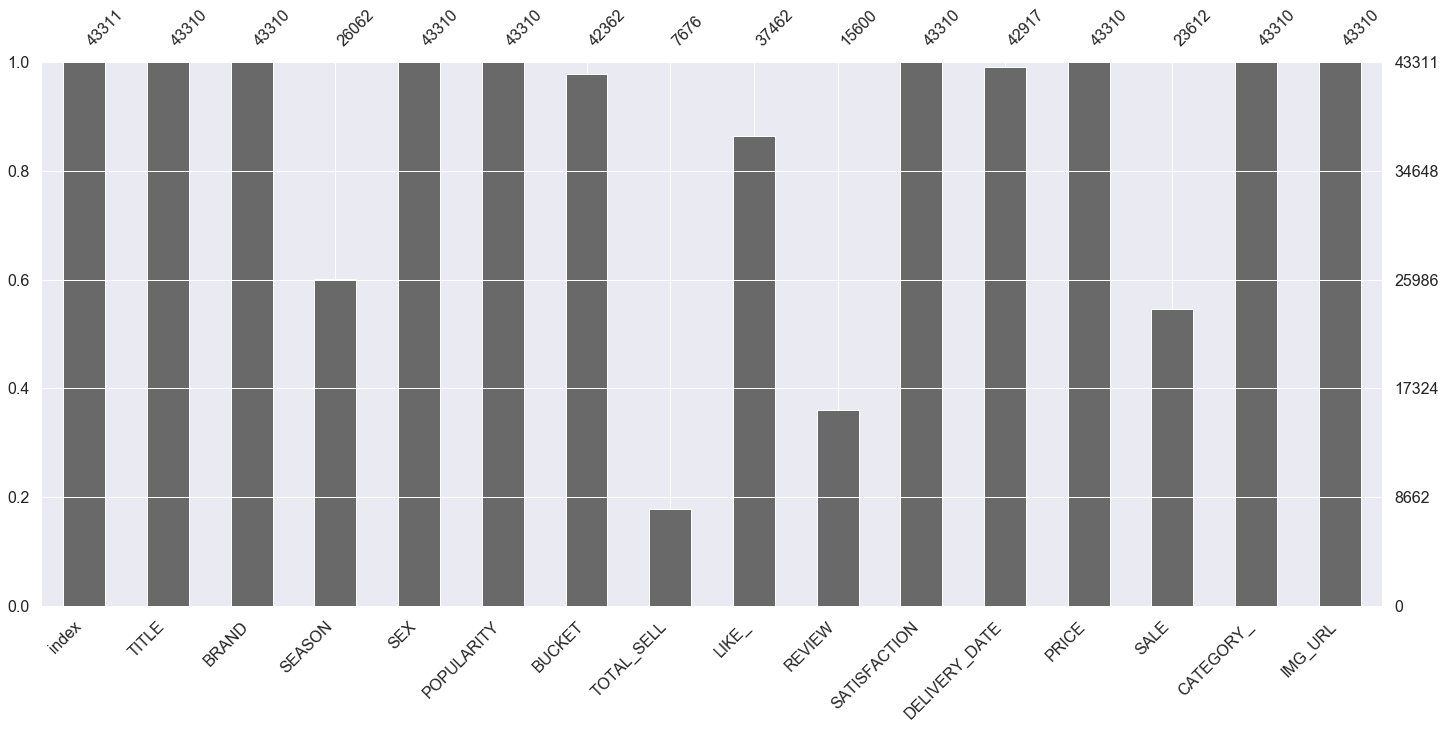

In [6]:
import missingno as msno
msno.bar(df=df_train)

In [7]:
#SALE의 null값은 할인률이 없는, 즉 할인하지 않는다는 의미이므로 0%로 바꿔준다
df_train['SALE'] = np.where(df_train['SALE'].isnull() ,0 , df_train['SALE'])
df_train

,index,TITLE,BRAND,SEASON,SEX,POPULARITY,BUCKET,TOTAL_SELL,LIKE_,REVIEW,SATISFACTION,DELIVERY_DATE,PRICE,SALE,CATEGORY_,IMG_URL
0,0,테이퍼드 히든 밴딩 크롭 슬랙스 [블랙]|TAPERED HIDDEN BANDING ...,MUSINSA STANDARD,2019ALL/,남,348380.0,28631.0,10000.0,12150.0,8845.0,94.0,2.0,31900.0,0.0,수트 팬츠/슬랙스,https://image.msscdn.net/images/goods_img/2019...
1,1,12/26 배송 캐시미어20 오버핏 더블 롱 코트 (블랙)|캐시미어20 오버핏 더블...,COOR,2019F/W/,남,170611.0,7235.0,3116.0,3617.0,2441.0,95.0,2.0,256800.0,20.0,겨울 기타 코트,https://image.msscdn.net/images/goods_img/2017...
2,2,Tydi crop jeans #0064|Tydi crop jeans #0064,FATALISM,2019F/W/,남,272331.0,16828.0,18525.0,10969.0,8960.0,94.0,2.0,86400.0,10.0,데님 팬츠,https://image.msscdn.net/images/goods_img/2017...
3,3,삼성 블루투스 이어폰 갤럭시버즈 SM-R170|삼성 블루투스 이어폰 갤럭시버즈 SM...,SAMSUNG ELECTRONICS,NaN,라이프,74163.0,7716.0,3305.0,1712.0,909.0,96.0,2.0,159500.0,0.0,이어폰,https://image.msscdn.net/images/goods_img/2019...
4,4,공용 알래스카 에어 프리미엄 푸퍼 점퍼 _ PHZ4JP3220GR|공용 알래스카 에...,POLHAM,2019F/W/,남,206928.0,6086.0,2286.0,3472.0,611.0,95.0,2.0,139000.0,30.0,숏 패딩/숏 헤비 아우터,https://image.msscdn.net/images/goods_img/2019...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50122,50122,MD CHERRY COKE MTM(IVORY)|MD CHERRY COKE MTM(I...,LUV IS TRUE,NaN,여,532.0,42.0,NaN,28.0,1.0,100.0,2.0,77000.0,0.0,맨투맨/스웨트셔츠,https://image.msscdn.net/images/goods_img/2019...
50123,50123,패널 스웨트셔츠 - Grey/Black|Panel Sweatshirt - Grey/...,D.PRIQUE,2019F/W/,남,287.0,13.0,NaN,10.0,NaN,100.0,2.0,69300.0,30.0,맨투맨/스웨트셔츠,https://image.msscdn.net/images/goods_img/2019...
50124,50124,N193USW900 멀린 플리스 부클 후리스 빅로고 맨투맨 HAVANA KHAKI|...,NATIONALGEOGRAPHIC,2019F/W/,남,1188.0,108.0,NaN,53.0,14.0,100.0,3.0,89000.0,0.0,맨투맨/스웨트셔츠,https://image.msscdn.net/images/goods_img/2019...
50125,50125,TIEDYE CREWNECK IA [MINT]|TIEDYE CREWNECK IA [...,VIVASTUDIO,2019F/W/,남,1389.0,176.0,26.0,119.0,16.0,95.0,2.0,72000.0,0.0,맨투맨/스웨트셔츠,https://image.msscdn.net/images/goods_img/2019...


In [8]:
#LIKE의 null값은 좋아요를 1개도 받지 못했다는 의미이므로 0개로 바꿔준다
df_train['LIKE_'] = np.where(df_train['LIKE_'].isnull() ,0 , df_train['LIKE_'])
df_train

,index,TITLE,BRAND,SEASON,SEX,POPULARITY,BUCKET,TOTAL_SELL,LIKE_,REVIEW,SATISFACTION,DELIVERY_DATE,PRICE,SALE,CATEGORY_,IMG_URL
0,0,테이퍼드 히든 밴딩 크롭 슬랙스 [블랙]|TAPERED HIDDEN BANDING ...,MUSINSA STANDARD,2019ALL/,남,348380.0,28631.0,10000.0,12150.0,8845.0,94.0,2.0,31900.0,0.0,수트 팬츠/슬랙스,https://image.msscdn.net/images/goods_img/2019...
1,1,12/26 배송 캐시미어20 오버핏 더블 롱 코트 (블랙)|캐시미어20 오버핏 더블...,COOR,2019F/W/,남,170611.0,7235.0,3116.0,3617.0,2441.0,95.0,2.0,256800.0,20.0,겨울 기타 코트,https://image.msscdn.net/images/goods_img/2017...
2,2,Tydi crop jeans #0064|Tydi crop jeans #0064,FATALISM,2019F/W/,남,272331.0,16828.0,18525.0,10969.0,8960.0,94.0,2.0,86400.0,10.0,데님 팬츠,https://image.msscdn.net/images/goods_img/2017...
3,3,삼성 블루투스 이어폰 갤럭시버즈 SM-R170|삼성 블루투스 이어폰 갤럭시버즈 SM...,SAMSUNG ELECTRONICS,NaN,라이프,74163.0,7716.0,3305.0,1712.0,909.0,96.0,2.0,159500.0,0.0,이어폰,https://image.msscdn.net/images/goods_img/2019...
4,4,공용 알래스카 에어 프리미엄 푸퍼 점퍼 _ PHZ4JP3220GR|공용 알래스카 에...,POLHAM,2019F/W/,남,206928.0,6086.0,2286.0,3472.0,611.0,95.0,2.0,139000.0,30.0,숏 패딩/숏 헤비 아우터,https://image.msscdn.net/images/goods_img/2019...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50122,50122,MD CHERRY COKE MTM(IVORY)|MD CHERRY COKE MTM(I...,LUV IS TRUE,NaN,여,532.0,42.0,NaN,28.0,1.0,100.0,2.0,77000.0,0.0,맨투맨/스웨트셔츠,https://image.msscdn.net/images/goods_img/2019...
50123,50123,패널 스웨트셔츠 - Grey/Black|Panel Sweatshirt - Grey/...,D.PRIQUE,2019F/W/,남,287.0,13.0,NaN,10.0,NaN,100.0,2.0,69300.0,30.0,맨투맨/스웨트셔츠,https://image.msscdn.net/images/goods_img/2019...
50124,50124,N193USW900 멀린 플리스 부클 후리스 빅로고 맨투맨 HAVANA KHAKI|...,NATIONALGEOGRAPHIC,2019F/W/,남,1188.0,108.0,NaN,53.0,14.0,100.0,3.0,89000.0,0.0,맨투맨/스웨트셔츠,https://image.msscdn.net/images/goods_img/2019...
50125,50125,TIEDYE CREWNECK IA [MINT]|TIEDYE CREWNECK IA [...,VIVASTUDIO,2019F/W/,남,1389.0,176.0,26.0,119.0,16.0,95.0,2.0,72000.0,0.0,맨투맨/스웨트셔츠,https://image.msscdn.net/images/goods_img/2019...


In [9]:
# season, review 항목은 사용하지 않기로 한다.
df_train = df_train.drop(['SEASON' , 'REVIEW'] , axis=1)
df_train

,index,TITLE,BRAND,SEX,POPULARITY,BUCKET,TOTAL_SELL,LIKE_,SATISFACTION,DELIVERY_DATE,PRICE,SALE,CATEGORY_,IMG_URL
0,0,테이퍼드 히든 밴딩 크롭 슬랙스 [블랙]|TAPERED HIDDEN BANDING ...,MUSINSA STANDARD,남,348380.0,28631.0,10000.0,12150.0,94.0,2.0,31900.0,0.0,수트 팬츠/슬랙스,https://image.msscdn.net/images/goods_img/2019...
1,1,12/26 배송 캐시미어20 오버핏 더블 롱 코트 (블랙)|캐시미어20 오버핏 더블...,COOR,남,170611.0,7235.0,3116.0,3617.0,95.0,2.0,256800.0,20.0,겨울 기타 코트,https://image.msscdn.net/images/goods_img/2017...
2,2,Tydi crop jeans #0064|Tydi crop jeans #0064,FATALISM,남,272331.0,16828.0,18525.0,10969.0,94.0,2.0,86400.0,10.0,데님 팬츠,https://image.msscdn.net/images/goods_img/2017...
3,3,삼성 블루투스 이어폰 갤럭시버즈 SM-R170|삼성 블루투스 이어폰 갤럭시버즈 SM...,SAMSUNG ELECTRONICS,라이프,74163.0,7716.0,3305.0,1712.0,96.0,2.0,159500.0,0.0,이어폰,https://image.msscdn.net/images/goods_img/2019...
4,4,공용 알래스카 에어 프리미엄 푸퍼 점퍼 _ PHZ4JP3220GR|공용 알래스카 에...,POLHAM,남,206928.0,6086.0,2286.0,3472.0,95.0,2.0,139000.0,30.0,숏 패딩/숏 헤비 아우터,https://image.msscdn.net/images/goods_img/2019...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50122,50122,MD CHERRY COKE MTM(IVORY)|MD CHERRY COKE MTM(I...,LUV IS TRUE,여,532.0,42.0,NaN,28.0,100.0,2.0,77000.0,0.0,맨투맨/스웨트셔츠,https://image.msscdn.net/images/goods_img/2019...
50123,50123,패널 스웨트셔츠 - Grey/Black|Panel Sweatshirt - Grey/...,D.PRIQUE,남,287.0,13.0,NaN,10.0,100.0,2.0,69300.0,30.0,맨투맨/스웨트셔츠,https://image.msscdn.net/images/goods_img/2019...
50124,50124,N193USW900 멀린 플리스 부클 후리스 빅로고 맨투맨 HAVANA KHAKI|...,NATIONALGEOGRAPHIC,남,1188.0,108.0,NaN,53.0,100.0,3.0,89000.0,0.0,맨투맨/스웨트셔츠,https://image.msscdn.net/images/goods_img/2019...
50125,50125,TIEDYE CREWNECK IA [MINT]|TIEDYE CREWNECK IA [...,VIVASTUDIO,남,1389.0,176.0,26.0,119.0,95.0,2.0,72000.0,0.0,맨투맨/스웨트셔츠,https://image.msscdn.net/images/goods_img/2019...


In [10]:
#null값이 총 row의 10%를 넘어버리면 분석에 방해를 준다
#y축인 TOTAL_SELL 값의 null 값이 40000이 되므로 삭제한다.
df_train = df_train.dropna()
df_train

,index,TITLE,BRAND,SEX,POPULARITY,BUCKET,TOTAL_SELL,LIKE_,SATISFACTION,DELIVERY_DATE,PRICE,SALE,CATEGORY_,IMG_URL
0,0,테이퍼드 히든 밴딩 크롭 슬랙스 [블랙]|TAPERED HIDDEN BANDING ...,MUSINSA STANDARD,남,348380.0,28631.0,10000.0,12150.0,94.0,2.0,31900.0,0.0,수트 팬츠/슬랙스,https://image.msscdn.net/images/goods_img/2019...
1,1,12/26 배송 캐시미어20 오버핏 더블 롱 코트 (블랙)|캐시미어20 오버핏 더블...,COOR,남,170611.0,7235.0,3116.0,3617.0,95.0,2.0,256800.0,20.0,겨울 기타 코트,https://image.msscdn.net/images/goods_img/2017...
2,2,Tydi crop jeans #0064|Tydi crop jeans #0064,FATALISM,남,272331.0,16828.0,18525.0,10969.0,94.0,2.0,86400.0,10.0,데님 팬츠,https://image.msscdn.net/images/goods_img/2017...
3,3,삼성 블루투스 이어폰 갤럭시버즈 SM-R170|삼성 블루투스 이어폰 갤럭시버즈 SM...,SAMSUNG ELECTRONICS,라이프,74163.0,7716.0,3305.0,1712.0,96.0,2.0,159500.0,0.0,이어폰,https://image.msscdn.net/images/goods_img/2019...
4,4,공용 알래스카 에어 프리미엄 푸퍼 점퍼 _ PHZ4JP3220GR|공용 알래스카 에...,POLHAM,남,206928.0,6086.0,2286.0,3472.0,95.0,2.0,139000.0,30.0,숏 패딩/숏 헤비 아우터,https://image.msscdn.net/images/goods_img/2019...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50107,50107,스마일 로고 스웨트셔츠 (브라운)|SMILE LOGO SWEATSHIRTS BROWN,COVE,여,461.0,50.0,12.0,35.0,80.0,4.0,30800.0,30.0,맨투맨/스웨트셔츠,https://image.msscdn.net/images/goods_img/2019...
50108,50108,GNAC POCKET SWEATSHIRT_OATMEAL|GNAC POCKET SWE...,ROMANTIC CROWN,여,1011.0,118.0,12.0,87.0,100.0,2.0,44000.0,20.0,맨투맨/스웨트셔츠,https://image.msscdn.net/images/goods_img/2019...
50114,50114,[NK] PROGRESSIVE SWEATSHIRTS (PURPLE) (19FW-K0...,NASTYKICK,남,978.0,198.0,56.0,151.0,92.0,2.0,31200.0,40.0,맨투맨/스웨트셔츠,https://image.msscdn.net/images/goods_img/2019...
50117,50117,[기모][K.N.I.T]밀리터리 아플리케 스웨트 셔츠 카키|[기모][K.N.I.T]...,BEYOND CLOSET,남,364.0,99.0,12.0,64.0,90.0,2.0,60000.0,20.0,맨투맨/스웨트셔츠,https://image.msscdn.net/images/goods_img/2019...


# 타겟값 분류

> 랭킹 페이지에서 10페이지 이하에 들어갈수록 상품의 판매량이 좋아질 것으로 예상한다. 따라서, 중복 값 제거 후의 인덱스 값(랭킹 순위)에 따라 800 이하일 경우를 1로, 이상일 경우를 0으로 놓는다.

In [11]:
# 상위 페이지를 나타내는 칼럼 'first_page' 생성, 0과 1로 나누어진다.
df_train['FIRST_PAGE'] = 0
df_train.head()

,index,TITLE,BRAND,SEX,POPULARITY,BUCKET,TOTAL_SELL,LIKE_,SATISFACTION,DELIVERY_DATE,PRICE,SALE,CATEGORY_,IMG_URL,FIRST_PAGE
0,0,테이퍼드 히든 밴딩 크롭 슬랙스 [블랙]|TAPERED HIDDEN BANDING ...,MUSINSA STANDARD,남,348380.0,28631.0,10000.0,12150.0,94.0,2.0,31900.0,0.0,수트 팬츠/슬랙스,https://image.msscdn.net/images/goods_img/2019...,0
1,1,12/26 배송 캐시미어20 오버핏 더블 롱 코트 (블랙)|캐시미어20 오버핏 더블...,COOR,남,170611.0,7235.0,3116.0,3617.0,95.0,2.0,256800.0,20.0,겨울 기타 코트,https://image.msscdn.net/images/goods_img/2017...,0
2,2,Tydi crop jeans #0064|Tydi crop jeans #0064,FATALISM,남,272331.0,16828.0,18525.0,10969.0,94.0,2.0,86400.0,10.0,데님 팬츠,https://image.msscdn.net/images/goods_img/2017...,0
3,3,삼성 블루투스 이어폰 갤럭시버즈 SM-R170|삼성 블루투스 이어폰 갤럭시버즈 SM...,SAMSUNG ELECTRONICS,라이프,74163.0,7716.0,3305.0,1712.0,96.0,2.0,159500.0,0.0,이어폰,https://image.msscdn.net/images/goods_img/2019...,0
4,4,공용 알래스카 에어 프리미엄 푸퍼 점퍼 _ PHZ4JP3220GR|공용 알래스카 에...,POLHAM,남,206928.0,6086.0,2286.0,3472.0,95.0,2.0,139000.0,30.0,숏 패딩/숏 헤비 아우터,https://image.msscdn.net/images/goods_img/2019...,0


In [12]:
# 1 페이지는 80개의 상품을 가지고 있기 때문에 상위 800개만 10페이지에 들어가게 된다.
df_train['FIRST_PAGE'][0:800] = 1
df_train.head()

,index,TITLE,BRAND,SEX,POPULARITY,BUCKET,TOTAL_SELL,LIKE_,SATISFACTION,DELIVERY_DATE,PRICE,SALE,CATEGORY_,IMG_URL,FIRST_PAGE
0,0,테이퍼드 히든 밴딩 크롭 슬랙스 [블랙]|TAPERED HIDDEN BANDING ...,MUSINSA STANDARD,남,348380.0,28631.0,10000.0,12150.0,94.0,2.0,31900.0,0.0,수트 팬츠/슬랙스,https://image.msscdn.net/images/goods_img/2019...,1
1,1,12/26 배송 캐시미어20 오버핏 더블 롱 코트 (블랙)|캐시미어20 오버핏 더블...,COOR,남,170611.0,7235.0,3116.0,3617.0,95.0,2.0,256800.0,20.0,겨울 기타 코트,https://image.msscdn.net/images/goods_img/2017...,1
2,2,Tydi crop jeans #0064|Tydi crop jeans #0064,FATALISM,남,272331.0,16828.0,18525.0,10969.0,94.0,2.0,86400.0,10.0,데님 팬츠,https://image.msscdn.net/images/goods_img/2017...,1
3,3,삼성 블루투스 이어폰 갤럭시버즈 SM-R170|삼성 블루투스 이어폰 갤럭시버즈 SM...,SAMSUNG ELECTRONICS,라이프,74163.0,7716.0,3305.0,1712.0,96.0,2.0,159500.0,0.0,이어폰,https://image.msscdn.net/images/goods_img/2019...,1
4,4,공용 알래스카 에어 프리미엄 푸퍼 점퍼 _ PHZ4JP3220GR|공용 알래스카 에...,POLHAM,남,206928.0,6086.0,2286.0,3472.0,95.0,2.0,139000.0,30.0,숏 패딩/숏 헤비 아우터,https://image.msscdn.net/images/goods_img/2019...,1


In [13]:
# first_page에 저장된 값들의 빈도수
df_train['FIRST_PAGE'].value_counts()

0    6864
1     800
Name: FIRST_PAGE, dtype: int64

In [14]:
#
total_sell_means = pd.DataFrame(data=[df_train['TOTAL_SELL'][0:1000].mean(),df_train['TOTAL_SELL'][1001:2000].mean(),df_train['TOTAL_SELL'][2001:3000].mean(),df_train['TOTAL_SELL'][3001:4000].mean(),df_train['TOTAL_SELL'][4001:5000].mean(),df_train['TOTAL_SELL'][5001:6000].mean(),df_train['TOTAL_SELL'][6001:7000].mean(),df_train['TOTAL_SELL'][7001:].mean()], index=range(0,8), columns=['means'])
display(pd.DataFrame(total_sell_means))

,means
0,2299.076000
1,834.423423
2,391.557558
3,42.561562
4,24.656657
5,31.031031
6,26.956957
7,23.449472


# 상관관계 분석

### 1. 인기도와 랭킹 사이의 관계

In [15]:
#인기도의 범주를 설정하기 위해 전체를 8등분한다
df_train_POPULARITY = df_train.sort_values(['POPULARITY'], ascending = False)
POPULARITY_mean = pd.DataFrame(data=[df_train_POPULARITY['POPULARITY'][0:1000].min(),df_train_POPULARITY['POPULARITY'][1001:2000].min(),df_train_POPULARITY['POPULARITY'][2001:3000].min(),df_train_POPULARITY['POPULARITY'][3001:4000].min(),df_train_POPULARITY['POPULARITY'][4001:5000].min(),df_train_POPULARITY['POPULARITY'][5001:6000].min(),df_train_POPULARITY['POPULARITY'][6001:7000].min(),df_train_POPULARITY['POPULARITY'][7001:].min()], index=range(0,8), columns=['mins'])
display(pd.DataFrame(POPULARITY_mean))

,mins
0,6973.0
1,2502.0
2,1227.0
3,637.0
4,346.0
5,203.0
6,114.0
7,22.0


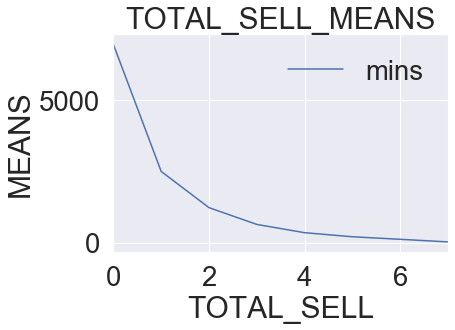

In [16]:
POPULARITY_mean.plot()
plt.title("TOTAL_SELL_MEANS")
plt.xlabel("TOTAL_SELL")
plt.ylabel("MEANS")
plt.show()

In [17]:
#인기도의 값이 여러개이기 때문에 범주를 만들어서 분석한다
#기준은 각 구간별의 mean의 값이다.
df_train['POPULARITY'] = np.where(df_train['POPULARITY'] <= 100, int('0'), df_train['POPULARITY'])
df_train['POPULARITY'] = np.where(df_train['POPULARITY'] > 7000, int('7'), df_train['POPULARITY'])
df_train['POPULARITY'] = np.where(df_train['POPULARITY'] > 2500, int('6'), df_train['POPULARITY'])
df_train['POPULARITY'] = np.where(df_train['POPULARITY'] > 1200, int('5'), df_train['POPULARITY'])
df_train['POPULARITY'] = np.where(df_train['POPULARITY'] > 650, int('4'), df_train['POPULARITY'])
df_train['POPULARITY'] = np.where(df_train['POPULARITY'] > 350, int('3'), df_train['POPULARITY'])
df_train['POPULARITY'] = np.where(df_train['POPULARITY'] > 200, int('2'), df_train['POPULARITY'])
df_train['POPULARITY'] = np.where(df_train['POPULARITY'] > 100, int('1'), df_train['POPULARITY'])

In [18]:
df_train[df_train['FIRST_PAGE'] == 1]['POPULARITY'].value_counts()

7.0    505
6.0    151
5.0     74
4.0     39
3.0     21
1.0      4
2.0      4
0.0      2
Name: POPULARITY, dtype: int64

In [19]:
#인기도 7.0의 0과 1의 분류를 보면 1 즉 첫번째 페이지에 더 많이 분포해 있는 것을 확인 할 수 있다.
pd.crosstab(df_train['POPULARITY'] , df_train['FIRST_PAGE'] , margins = True)

FIRST_PAGE,0,1,All
POPULARITY,,,
0.0,496,2,498
1.0,1147,4,1151
2.0,1036,4,1040
3.0,978,21,999
4.0,908,39,947
5.0,955,74,1029
6.0,851,151,1002
7.0,493,505,998
All,6864,800,7664


### 2. 장바구니와 랭킹 사이의 관계

In [20]:
#장바구니의 범주를 설정하기 위해 전체를 8등분한다
df_train_BUCKET = df_train.sort_values(['BUCKET'], ascending = False)
BUCKET_min = pd.DataFrame(data=[df_train_BUCKET['BUCKET'][0:1000].min(),df_train_BUCKET['BUCKET'][1001:2000].min(),df_train_BUCKET['BUCKET'][2001:3000].min(),df_train_BUCKET['BUCKET'][3001:4000].min(),df_train_BUCKET['BUCKET'][4001:5000].min(),df_train_BUCKET['BUCKET'][5001:6000].min(),df_train_BUCKET['BUCKET'][6001:7000].min(),df_train_BUCKET['BUCKET'][7001:].min()], index=range(0,8), columns=['mins'])
display(pd.DataFrame(BUCKET_min))

,mins
0,705.0
1,261.0
2,151.0
3,102.0
4,71.0
5,49.0
6,30.0
7,5.0


In [21]:
#인기도의 값이 여러개이기 때문에 범주를 만들어서 분석한다
#기준은 각 구간별의 min의 값이다.
df_train['BUCKET'] = np.where(df_train['BUCKET'] <= 10, int('0'), df_train['BUCKET'])
df_train['BUCKET'] = np.where(df_train['BUCKET'] > 700, int('7'), df_train['BUCKET'])
df_train['BUCKET'] = np.where(df_train['BUCKET'] > 250, int('6'), df_train['BUCKET'])
df_train['BUCKET'] = np.where(df_train['BUCKET'] > 150, int('5'), df_train['BUCKET'])
df_train['BUCKET'] = np.where(df_train['BUCKET'] > 100, int('4'), df_train['BUCKET'])
df_train['BUCKET'] = np.where(df_train['BUCKET'] > 70, int('3'), df_train['BUCKET'])
df_train['BUCKET'] = np.where(df_train['BUCKET'] > 50, int('2'), df_train['BUCKET'])
df_train['BUCKET'] = np.where(df_train['BUCKET'] > 10, int('1'), df_train['BUCKET'])

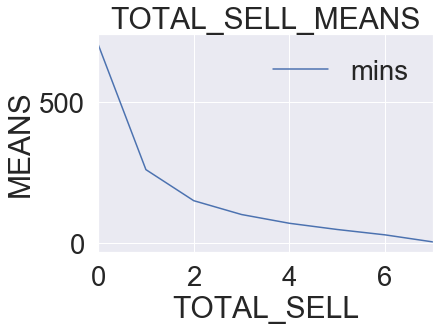

In [22]:
BUCKET_min.plot()
plt.title("TOTAL_SELL_MEANS")
plt.xlabel("TOTAL_SELL")
plt.ylabel("MEANS")
plt.show()

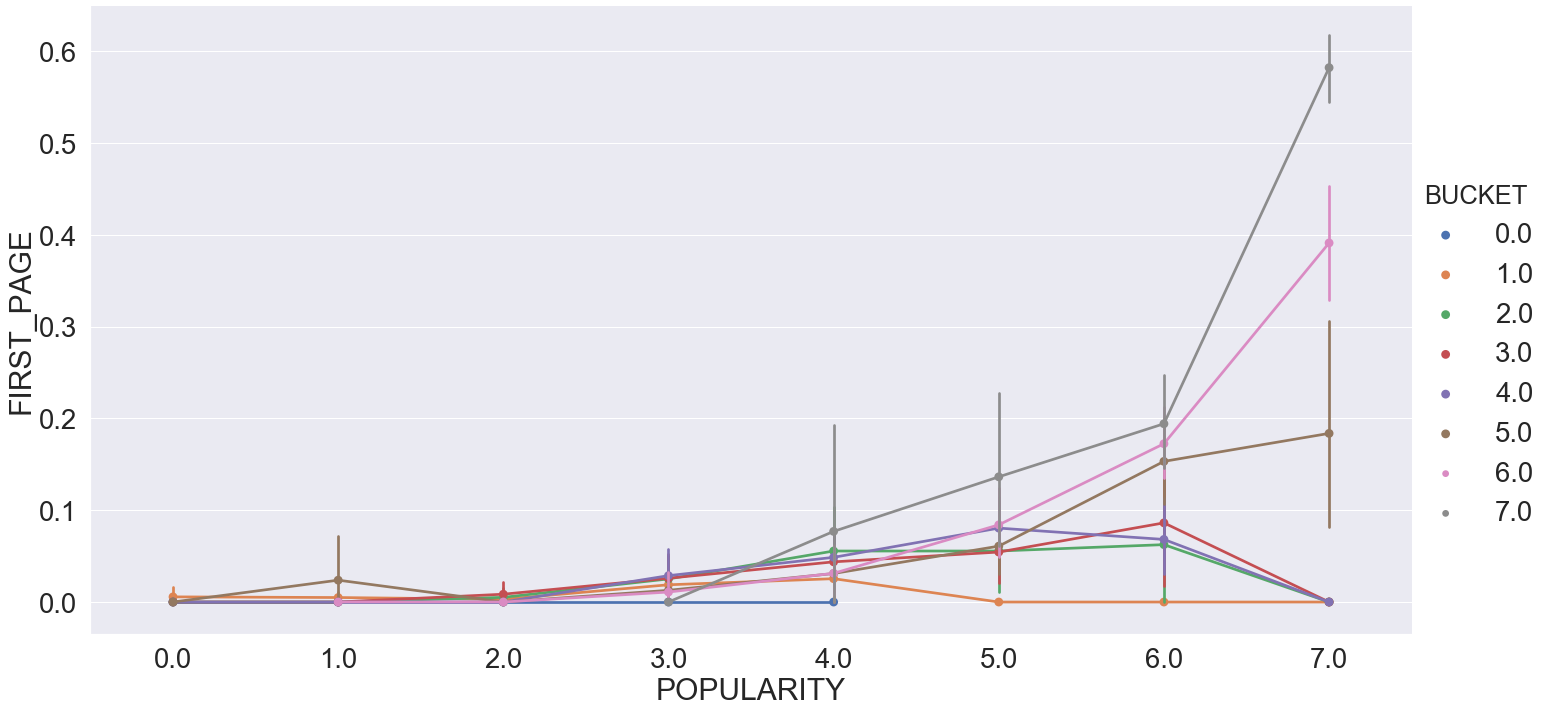

In [23]:
#장바구니 갯수에 대한 범주값 별로 FIRST_PAGE컬럼과 POPULARITY컬럼을 교차해서 그래프를 그림
sns.factorplot('POPULARITY' , 'FIRST_PAGE' , hue = 'BUCKET', data = df_train,size=10,aspect=2)

### 3. 좋아요 갯수와 랭킹 사이의 관계

In [24]:
#좋아요 갯수의 범주를 설정하기 위해 전체를 8등분한다
df_train_LIKE = df_train.sort_values(['LIKE_'], ascending = False)
LIKE_min = pd.DataFrame(data=[df_train_LIKE['LIKE_'][0:1000].min(),df_train_LIKE['LIKE_'][1001:2000].min(),df_train_LIKE['LIKE_'][2001:3000].min(),df_train_LIKE['LIKE_'][3001:4000].min(),df_train_LIKE['LIKE_'][4001:5000].min(),df_train_LIKE['LIKE_'][5001:6000].min(),df_train_LIKE['LIKE_'][6001:7000].min(),df_train_LIKE['LIKE_'][7001:].min()], index=range(0,8), columns=['mins'])
display(pd.DataFrame(LIKE_min))

,mins
0,451.0
1,174.0
2,104.0
3,71.0
4,50.0
5,34.0
6,19.0
7,0.0


In [25]:
#좋아요의 값이 여러개이기 때문에 범주를 만들어서 분석한다
#기준은 각 구간별의 mean의 값이다.
df_train['LIKE_'] = np.where(df_train['LIKE_'] <= 20, int('0'), df_train['LIKE_'])
df_train['LIKE_'] = np.where(df_train['LIKE_'] > 450, int('7'), df_train['LIKE_'])
df_train['LIKE_'] = np.where(df_train['LIKE_'] > 200, int('6'), df_train['LIKE_'])
df_train['LIKE_'] = np.where(df_train['LIKE_'] > 100, int('5'), df_train['LIKE_'])
df_train['LIKE_'] = np.where(df_train['LIKE_'] > 70, int('4'), df_train['LIKE_'])
df_train['LIKE_'] = np.where(df_train['LIKE_'] > 50, int('3'), df_train['LIKE_'])
df_train['LIKE_'] = np.where(df_train['LIKE_'] > 35, int('2'), df_train['LIKE_'])
df_train['LIKE_'] = np.where(df_train['LIKE_'] > 20, int('1'), df_train['LIKE_'])

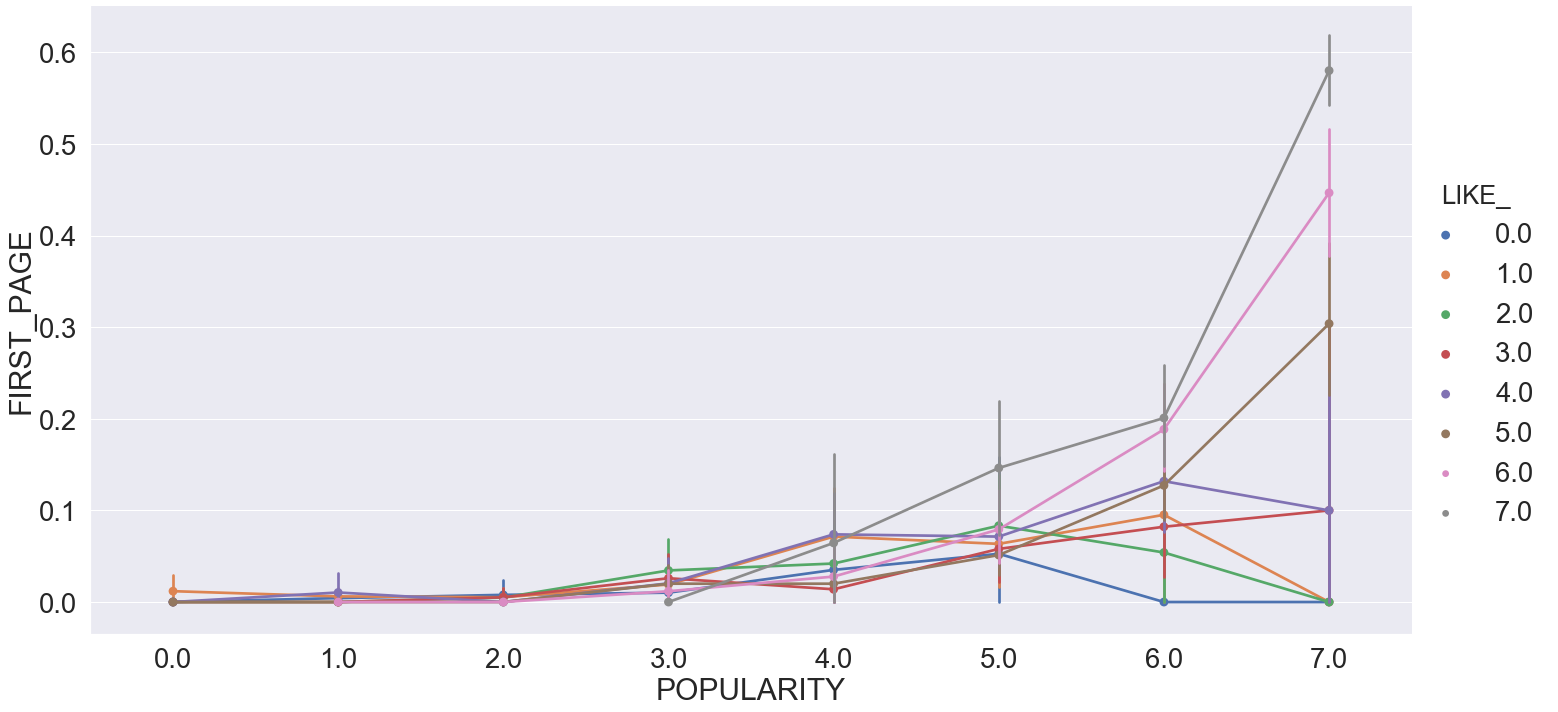

In [26]:
#장바구니 갯수에 대한 범주값 별로 FIRST_PAGE컬럼과 POPULARITY컬럼을 교차해서 그래프를 그림
sns.factorplot('POPULARITY' , 'FIRST_PAGE' , hue = 'LIKE_', data = df_train,size=10,aspect=2)

### 4. 누적판매량과 랭킹 사이의 관계

In [27]:
##총판매량의 범주를 설정하기 위해 전체를 8등분한다
df_train_TOTAL_SELL = df_train.sort_values(['TOTAL_SELL'], ascending = False)
TOTAL_SELL_min = pd.DataFrame(data=[df_train_TOTAL_SELL['TOTAL_SELL'][0:1000].min(),df_train_TOTAL_SELL['TOTAL_SELL'][1001:2000].min(),df_train_TOTAL_SELL['TOTAL_SELL'][2001:3000].min(),df_train_TOTAL_SELL['TOTAL_SELL'][3001:4000].min(),df_train_TOTAL_SELL['TOTAL_SELL'][4001:5000].min(),df_train_TOTAL_SELL['TOTAL_SELL'][5001:6000].min(),df_train_TOTAL_SELL['TOTAL_SELL'][6001:7000].min(),df_train_TOTAL_SELL['TOTAL_SELL'][7001:].min()], index=range(0,8), columns=['mins'])
display(pd.DataFrame(TOTAL_SELL_min))

,mins
0,383.0
1,89.0
2,43.0
3,27.0
4,19.0
5,14.0
6,11.0
7,10.0


In [28]:
#총판매량의 값이 여러개이기 때문에 범주를 만들어서 분석한다
df_train['TOTAL_SELL'] = np.where(df_train['TOTAL_SELL'] <= 10, int('0'), df_train['TOTAL_SELL'])
df_train['TOTAL_SELL'] = np.where(df_train['TOTAL_SELL'] > 380, int('7'), df_train['TOTAL_SELL'])
df_train['TOTAL_SELL'] = np.where(df_train['TOTAL_SELL'] > 90, int('6'), df_train['TOTAL_SELL'])
df_train['TOTAL_SELL'] = np.where(df_train['TOTAL_SELL'] > 40, int('5'), df_train['TOTAL_SELL'])
df_train['TOTAL_SELL'] = np.where(df_train['TOTAL_SELL'] > 30, int('4'), df_train['TOTAL_SELL'])
df_train['TOTAL_SELL'] = np.where(df_train['TOTAL_SELL'] > 20, int('3'), df_train['TOTAL_SELL'])
df_train['TOTAL_SELL'] = np.where(df_train['TOTAL_SELL'] > 15, int('2'), df_train['TOTAL_SELL'])
df_train['TOTAL_SELL'] = np.where(df_train['TOTAL_SELL'] > 10, int('1'), df_train['TOTAL_SELL'])

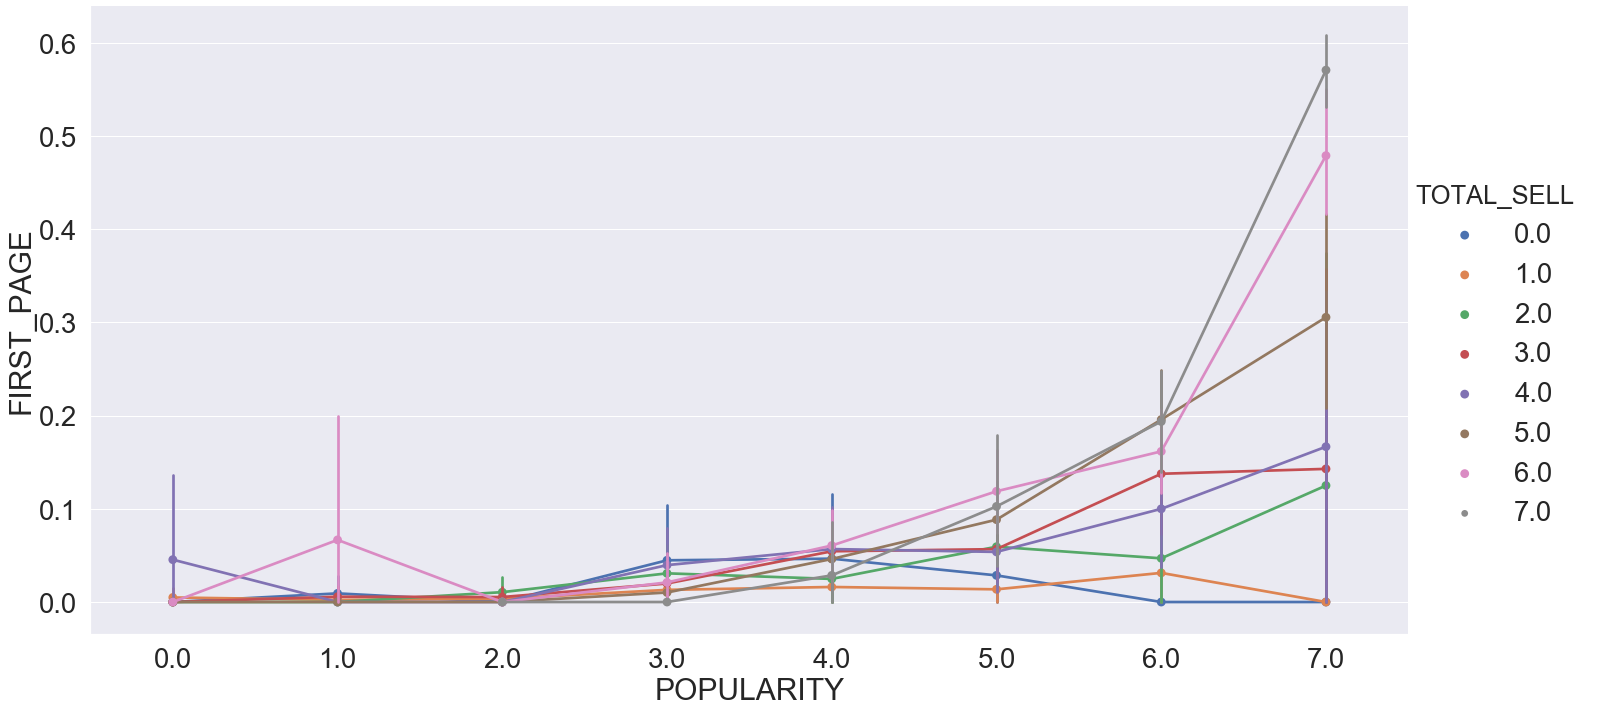

In [29]:
sns.factorplot('POPULARITY' , 'FIRST_PAGE' , hue = 'TOTAL_SELL', data = df_train,size=10,aspect=2)

### 5. 만족도와 랭킹 사이의 관계

In [30]:
# Satisfaction 컬럼의 빈도수 조회
df_train['SATISFACTION'].value_counts()

100.0    1250
93.0      824
90.0      634
95.0      615
94.0      504
92.0      494
80.0      477
96.0      424
91.0      370
87.0      273
97.0      271
88.0      245
98.0      233
89.0      207
85.0      158
84.0      107
86.0       86
60.0       81
83.0       74
70.0       54
73.0       44
99.0       40
82.0       35
75.0       22
76.0       21
78.0       18
77.0       17
67.0       13
72.0       10
40.0        9
74.0        8
81.0        7
20.0        6
65.0        6
68.0        5
79.0        4
64.0        3
53.0        3
50.0        3
71.0        2
47.0        2
66.0        2
69.0        2
56.0        1
Name: SATISFACTION, dtype: int64

In [31]:
df_train[df_train['FIRST_PAGE'] == 1]['SATISFACTION'].value_counts()

94.0     127
95.0     117
93.0     105
92.0      79
96.0      69
91.0      61
90.0      43
97.0      40
100.0     35
98.0      23
89.0      23
88.0      19
80.0      16
85.0       9
99.0       7
87.0       7
86.0       5
83.0       3
82.0       3
60.0       2
84.0       2
81.0       2
73.0       1
72.0       1
78.0       1
Name: SATISFACTION, dtype: int64

In [32]:
df_train[df_train['FIRST_PAGE'] == 0]['SATISFACTION'].value_counts()

100.0    1215
93.0      719
90.0      591
95.0      498
80.0      461
92.0      415
94.0      377
96.0      355
91.0      309
87.0      266
97.0      231
88.0      226
98.0      210
89.0      184
85.0      149
84.0      105
86.0       81
60.0       79
83.0       71
70.0       54
73.0       43
99.0       33
82.0       32
75.0       22
76.0       21
77.0       17
78.0       17
67.0       13
40.0        9
72.0        9
74.0        8
65.0        6
20.0        6
68.0        5
81.0        5
79.0        4
50.0        3
64.0        3
53.0        3
69.0        2
71.0        2
47.0        2
66.0        2
56.0        1
Name: SATISFACTION, dtype: int64

In [33]:
# satisfaction 컬럼에서 랭킹 지수 first_page=1인 줄 대입
high_ranking = df_train['SATISFACTION'][df_train['FIRST_PAGE'] == 1]
high_ranking

0       94.0
1       95.0
2       94.0
3       96.0
4       95.0
        ... 
1352    91.0
1353    78.0
1354    95.0
1355    93.0
1357    94.0
Name: SATISFACTION, Length: 800, dtype: float64

In [34]:
# satisfaction 컬럼에서 랭킹 지수 first_page=0인 줄 대입
low_ranking = df_train['SATISFACTION'][df_train['FIRST_PAGE'] == 0]
low_ranking

1358      93.0
1359      94.0
1360      92.0
1361      90.0
1364      88.0
         ...  
50107     80.0
50108    100.0
50114     92.0
50117     90.0
50125     95.0
Name: SATISFACTION, Length: 6864, dtype: float64

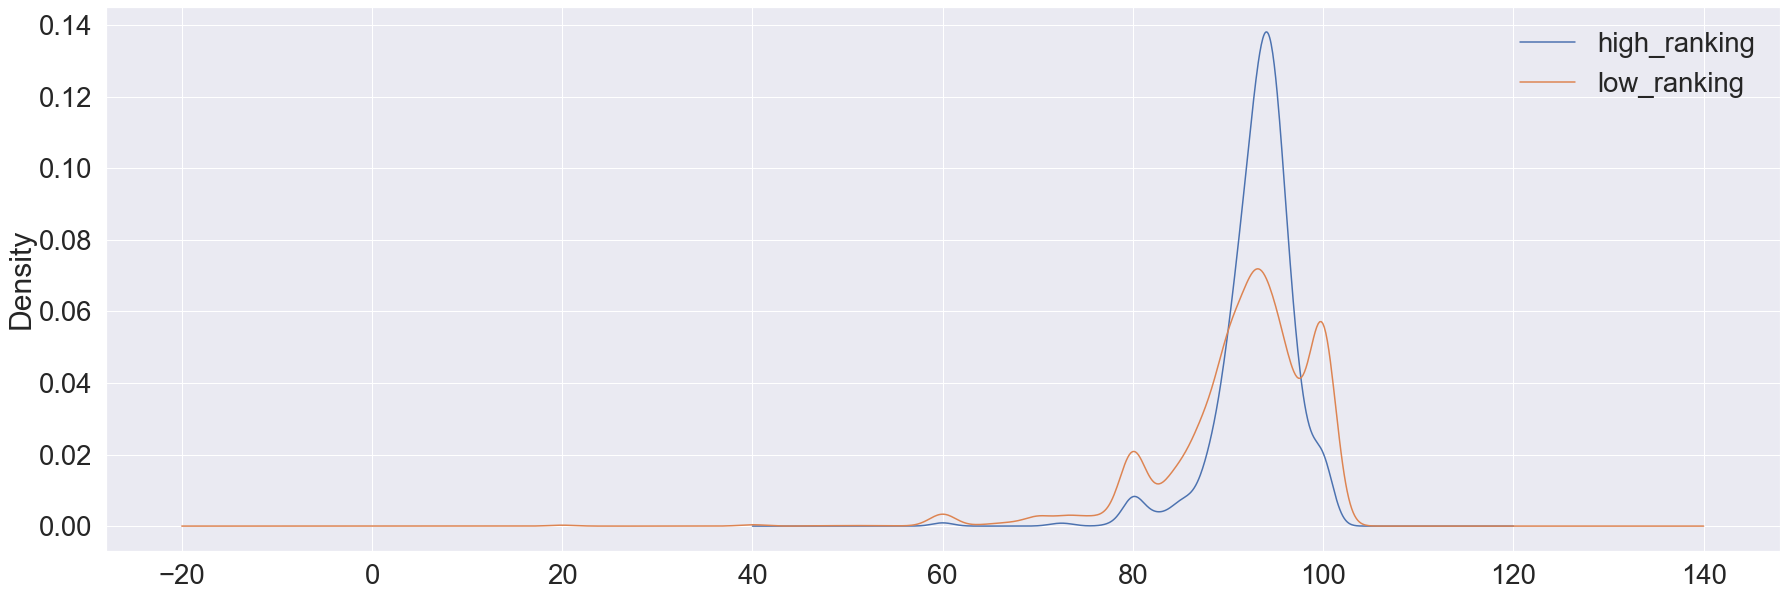

In [35]:
# satisfaction 컬럼에서 각 만족도 별 high_ranking과  low_ranking 비율을 그래프로 그려보자
plt.figure(figsize=(30,10))
high_ranking.plot(kind='kde')
low_ranking.plot(kind='kde')
plt.legend(['high_ranking', 'low_ranking'])

- 높낮이를 보면, 낮은 랭킹에 비해 높은 랭킹에서 만족도가 특정 범위에 뚜렷하게 집중되어 있는 것을 볼 수 있다. 
- 또, 그래프 모양을 봤을 때 low_ranking보다 high_ranking의 축이 더 오른쪽에 치우쳐져 있는 것을 볼 수 있다. 이는 랭킹이 높은 상품의 만족도가 낮은 랭킹의 상품들보다 높다는 것을 보여준다.

### 6. 배송 소요 시간과 랭킹 사이의 관계

In [36]:
# 각 배송일 별 상품의 수 조회
df_train['DELIVERY_DATE'].value_counts()

2.0     5808
1.0     1054
3.0      621
4.0      133
5.0       20
7.0       12
6.0        7
12.0       6
9.0        2
8.0        1
Name: DELIVERY_DATE, dtype: int64

In [37]:
# 높은 랭킹의 상품들 중 배송일이 빠른 순서로 데이터프레임화 시킨다. 
df_temp = df_train[df_train['FIRST_PAGE'] == 1]['DELIVERY_DATE'].value_counts()
df_delivery_high = pd.DataFrame({'delivery_date':df_temp.index, 'frequency':df_temp.values})
df_delivery_high.sort_values('delivery_date', ascending=True)

,delivery_date,frequency
2,1.0,32
0,2.0,662
1,3.0,68
3,4.0,30
4,7.0,3
6,9.0,2
5,12.0,3


In [38]:
# 낮은 랭킹의 상품들 중 배송일이 빠른 순서로 데이터프레임화 시킨다. 
df_temp = df_train[df_train['FIRST_PAGE'] == 0]['DELIVERY_DATE'].value_counts()
df_delivery_low = pd.DataFrame({'delivery_date':df_temp.index, 'frequency':df_temp.values})
df_delivery_low.sort_values('delivery_date', ascending=True)

,delivery_date,frequency
1,1.0,1022
0,2.0,5146
2,3.0,553
3,4.0,103
4,5.0,20
6,6.0,7
5,7.0,9
8,8.0,1
7,12.0,3


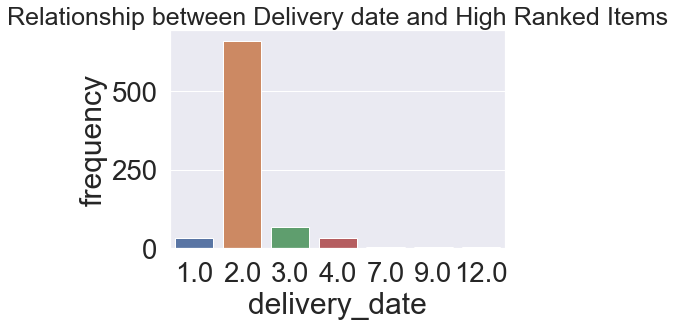

In [39]:
# 배송일 별 높은 랭킹의 상품들 분포도
sns.barplot(x='delivery_date', y='frequency', data=df_delivery_high, dodge=False)
plt.title('Relationship between Delivery date and High Ranked Items', fontsize='25')
plt.show()

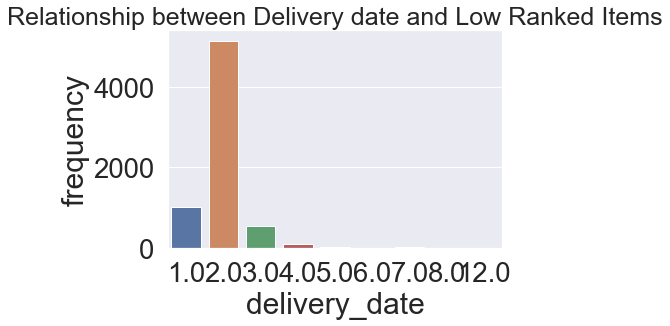

In [40]:
# 배송일 별 낮은 랭킹의 상품 분포도
sns.barplot(x='delivery_date', y='frequency', data=df_delivery_low, dodge=False)
plt.title('Relationship between Delivery date and Low Ranked Items', fontsize='25')
plt.show()

- 두 그래프를 비교해보면, 랭킹의 높고 낮음에 상관없이 배송일이 2일일 경우에 가장 많은 상품들이 군집되어 있고, 1일 혹은 3일이 소요되는 상품들이 큰 격차를 두고 분포함을 알 수 있다. 
- 이는 배송일이 랭킹의 높고 낮음에 큰 영향을 미치지 않음을 의미하므로, 해당 데이터는 x값에서 제외시키도록 한다.

### 7. 가격과 랭킹 사이의 관계

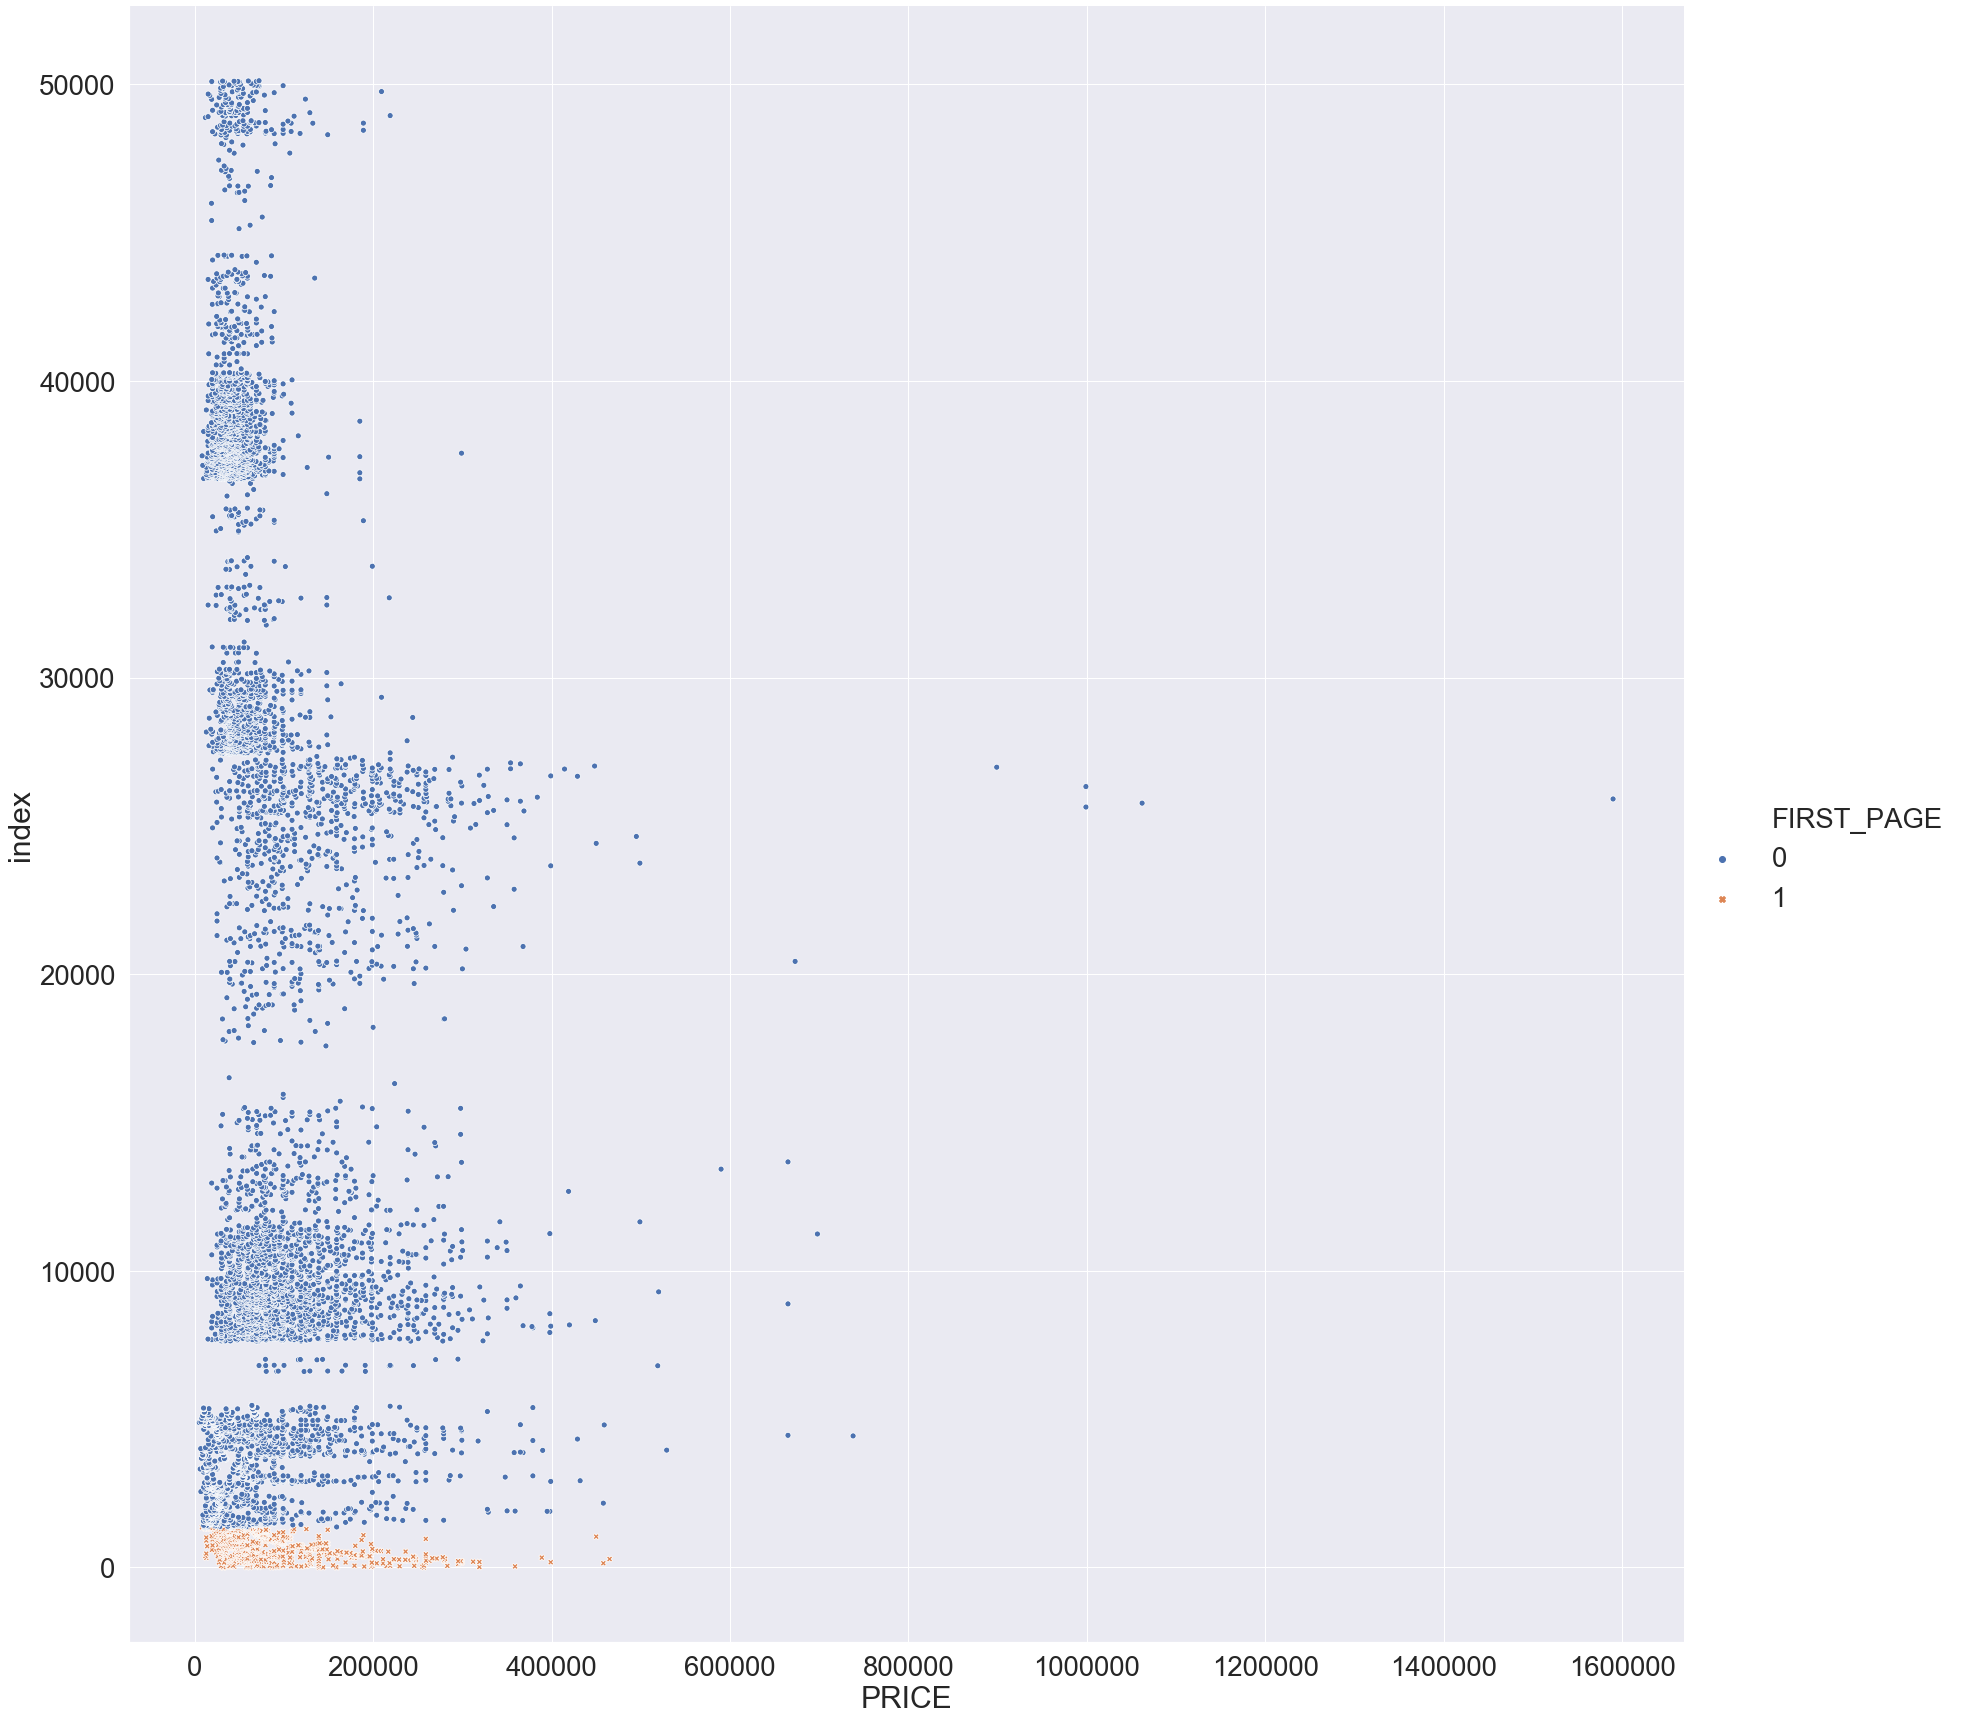

In [43]:
sns.relplot(x="PRICE", y="index", hue="FIRST_PAGE", style="FIRST_PAGE", data=df_train, height=24, aspect=1)

In [58]:
df_train_PRICE = df_train.copy()
df_train_PRICE = df_train_PRICE.drop(['TITLE', 'BRAND', 'SEX', 'CATEGORY_', 'POPULARITY','BUCKET', 'TOTAL_SELL', 'LIKE_', 'SATISFACTION', 'DELIVERY_DATE', 'SALE', 'IMG_URL'], axis=1)
df_train_PRICE

,index,PRICE,FIRST_PAGE
0,0,31900.0,1
1,1,256800.0,1
2,2,86400.0,1
3,3,159500.0,1
4,4,139000.0,1
...,...,...,...
50107,50107,30800.0,0
50108,50108,44000.0,0
50114,50114,31200.0,0
50117,50117,60000.0,0


In [67]:
# 가격의 범주를 만들어서 분석한다, 기준은 각 구간별의 max의 값이다.
df_train_PRICE['PRICE'] = np.where(df_train_PRICE['PRICE']<=50000, int('0'), df_train_PRICE['PRICE'])
df_train_PRICE['PRICE'] = np.where(df_train_PRICE['PRICE']>50000, int('1'), df_train_PRICE['PRICE'])
df_train_PRICE['PRICE'] = np.where(df_train_PRICE['PRICE']>100000, int('2'), df_train_PRICE['PRICE'])
df_train_PRICE['PRICE'] = np.where(df_train_PRICE['PRICE']>200000, int('3'), df_train_PRICE['PRICE'])
df_train_PRICE['PRICE'] = np.where(df_train_PRICE['PRICE']>500000, int('4'), df_train_PRICE['PRICE'])
df_train_PRICE

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

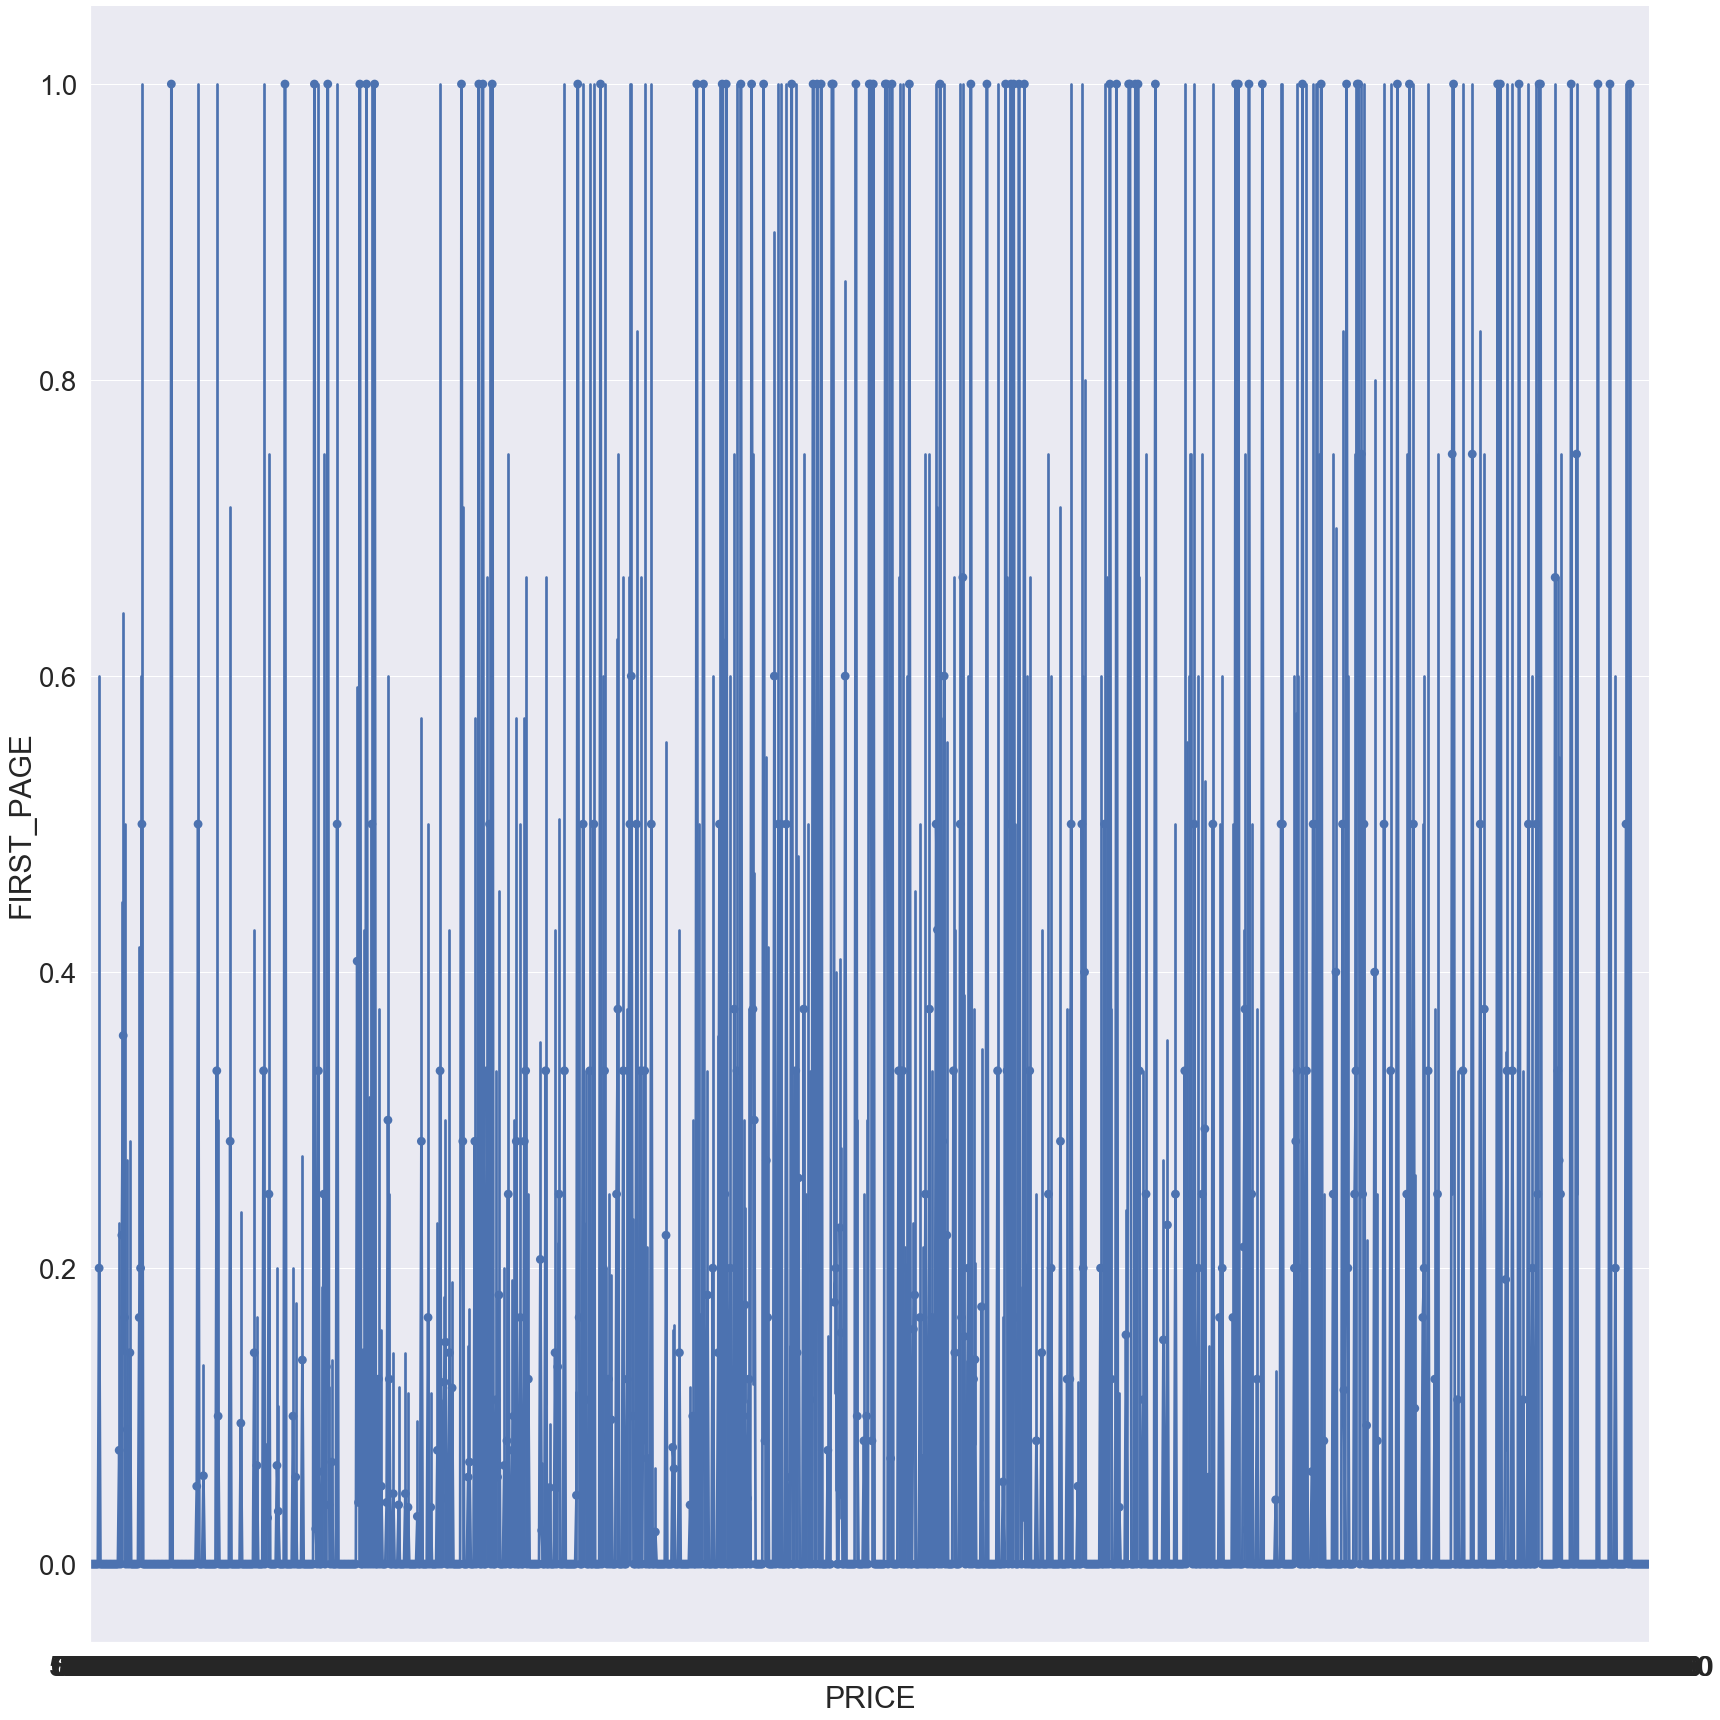

In [45]:
# 상위랭크의 상품들을 집중해서 보자
sns.factorplot(x="price", y="frequency", hue="rank", data=df_train_PRICE, height=24, aspect=1)

- 주황색으로 표시된 점들이 상위랭킹 상품들, 파란색 점들이 하위랭킹 상품들이다. 상위랭킹 상품들의 분포를 집중적으로 볼 때, 모든 상품의 가격대가 50만원 미만으로 형성되어 있으며, 특히 10만원 미만의 가격대에 상품이 몰려있음을 알 수 있다. 

### 8. 할인률과 랭킹 사이의 관계

In [48]:
df_train['SALE'].value_counts()

0.0     2894
30.0     825
20.0     753
10.0     619
50.0     399
        ... 
76.0       1
78.0       1
90.0       1
3.0        1
85.0       1
Name: SALE, Length: 84, dtype: int64

In [69]:
df_train_SALE = df_train.copy()
df_train_SALE = df_train_SALE.sort_values(['SALE'], ascending = False)
df_train_SALE

,index,TITLE,BRAND,SEX,POPULARITY,BUCKET,TOTAL_SELL,LIKE_,SATISFACTION,DELIVERY_DATE,PRICE,SALE,CATEGORY_,IMG_URL,FIRST_PAGE
2764,2764,T37F HOODIE HIGHNECK JUMPER (DARK GREEN)|T37F ...,TRYTOTALK,남,3.0,2.0,1.0,2.0,80.0,2.0,14500.0,90.0,기타,https://image.msscdn.net/images/goods_img/2017...,0
11034,11034,버드 스카잔 KJP6701|버드 스카잔 KJP6701,KONUS,남,5.0,4.0,5.0,4.0,88.0,2.0,52000.0,87.0,블루종/MA-1,https://image.msscdn.net/images/goods_img/2019...,0
26189,26189,패딩 셔츠 KSL6O01_BK|패딩 셔츠 KSL6O01_BK,KONUS,남,5.0,3.0,2.0,2.0,100.0,2.0,39000.0,86.0,숏 패딩/숏 헤비 아우터,https://image.msscdn.net/images/goods_img/2019...,0
3993,3993,Ltu Hood (U17DTHD62)|Ltu Hood (U17DTHD62),UNLIMIT,남,7.0,7.0,7.0,7.0,85.0,2.0,10000.0,86.0,후드 스웨트셔츠/후드 집업,https://image.msscdn.net/images/goods_img/2017...,0
9043,9043,봄버 점퍼 WWO8499|봄버 점퍼 WWO8499,KONUS,남,4.0,2.0,1.0,1.0,87.0,2.0,77000.0,86.0,블루종/MA-1,https://image.msscdn.net/images/goods_img/2019...,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9738,9738,위캔 윈드 집업 자켓 카키그레이 YHJK2232|Wecan Wind Zipup Ja...,JEMUT,남,2.0,4.0,1.0,4.0,100.0,1.0,63000.0,0.0,사파리/헌팅 재킷,https://image.msscdn.net/images/goods_img/2019...,0
9740,9740,특전사팀 기능성 티셔츠(SGT)|특전사팀 기능성 티셔츠(SGT),POSTX,남,2.0,1.0,2.0,0.0,90.0,2.0,14000.0,0.0,기타,https://image.msscdn.net/images/goods_img/2017...,0
9742,9742,로고 사이드라인 트랙탑 (라이트블루)EJ1MHFT701|로고 사이드라인 트랙탑 (라...,ELLESSE,남,1.0,1.0,2.0,2.0,93.0,2.0,59000.0,0.0,기타,https://image.msscdn.net/images/goods_img/2019...,0
9744,9744,TOME.5 BEIGE HOODIE ANORAK|TOME.5 BEIGE HOODIE...,OVERR,남,2.0,5.0,5.0,5.0,94.0,1.0,89000.0,0.0,나일론/코치/아노락 재킷,https://image.msscdn.net/images/goods_img/2018...,0


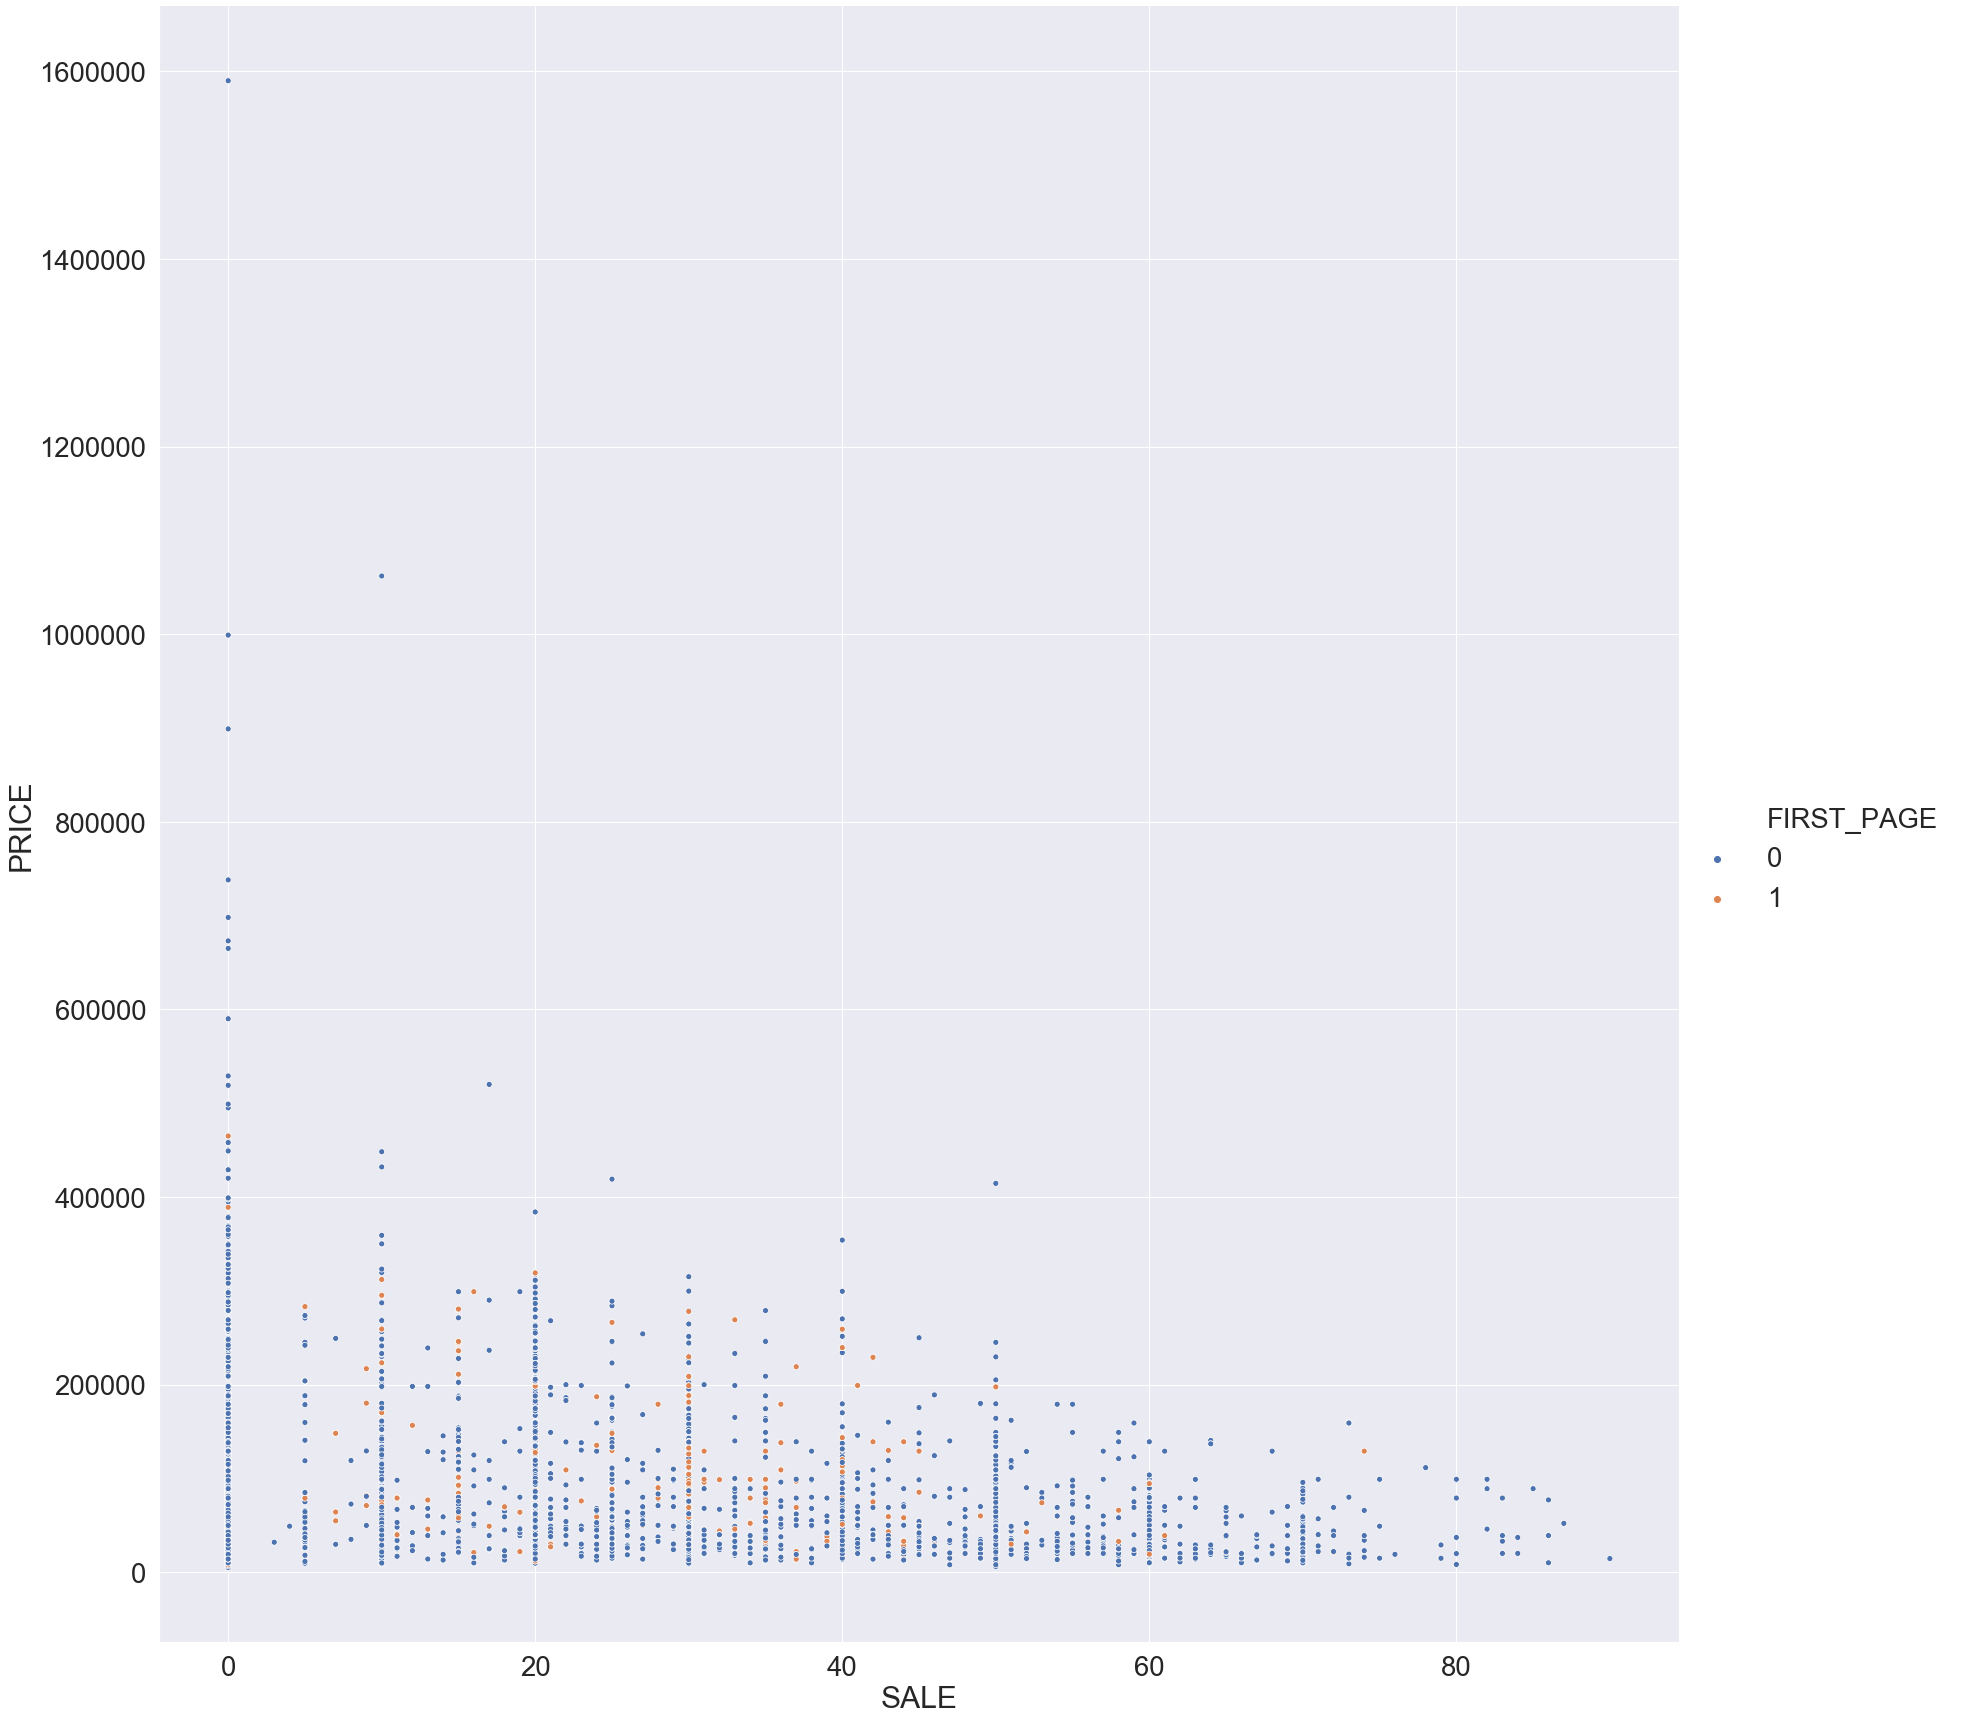

In [73]:
sns.relplot('SALE', 'PRICE', hue='FIRST_PAGE', data = df_train_SALE, height=24, aspect=1)

In [49]:
# satisfaction 컬럼에서 랭킹 지수 first_page=1인 줄 대입
high_ranking = df_train['SALE'][df_train['FIRST_PAGE'] == 1]
high_ranking

0        0.0
1       20.0
2       10.0
3        0.0
4       30.0
        ... 
1352     0.0
1353     0.0
1354     0.0
1355     0.0
1357    10.0
Name: SALE, Length: 800, dtype: float64

In [51]:
# satisfaction 컬럼에서 랭킹 지수 first_page=0인 줄 대입
low_ranking = df_train['SALE'][df_train['FIRST_PAGE'] == 0]
low_ranking

1358     10.0
1359     10.0
1360     10.0
1361     30.0
1364     19.0
         ... 
50107    30.0
50108    20.0
50114    40.0
50117    20.0
50125     0.0
Name: SALE, Length: 6864, dtype: float64

- 위의 결과에서 알 수 있듯이, 

### 9. 상관관계 파악

In [74]:
df_train.corr()["FIRST_PAGE"]

index           -0.365371
POPULARITY       0.410089
BUCKET           0.381967
TOTAL_SELL       0.363192
LIKE_            0.356215
SATISFACTION     0.067232
DELIVERY_DATE    0.093426
PRICE            0.051652
SALE            -0.072227
FIRST_PAGE       1.000000
Name: FIRST_PAGE, dtype: float64

- 범주화시켜서 진행한 상위 4개의 카테고리가 랭킹을 정하는 데에 큰 영향을 미친다는 것을 알 수 있다.

### 10. 컬럼 별 기울기 정보 파악

In [75]:
df_train.skew()

index            0.655611
POPULARITY      -0.001853
BUCKET           0.085941
TOTAL_SELL       0.075849
LIKE_           -0.046026
SATISFACTION    -2.277302
DELIVERY_DATE    4.144066
PRICE            3.798659
SALE             0.769726
FIRST_PAGE       2.588276
dtype: float64

- 사용하지 않을 컬럼 satisfaction과 delivery_date를 제외하고, 가장 기울어진 컬럼인 PRICE에 대해 정제해보기로 한다.

(array([6.764e+03, 8.060e+02, 7.600e+01, 7.000e+00, 6.000e+00, 1.000e+00,
        3.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([   5000.,  163500.,  322000.,  480500.,  639000.,  797500.,
         956000., 1114500., 1273000., 1431500., 1590000.]),
 <a list of 10 Patch objects>)

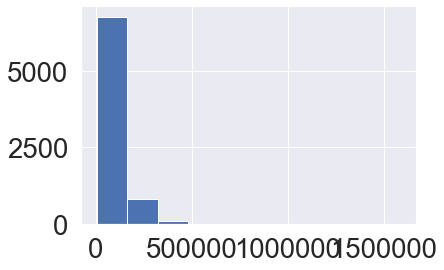

In [76]:
# 기울기가 가장 높은 컬럼 시각화
plt.hist(df_train["PRICE"])

(array([  13.,  267.,  797., 1912., 2308., 1381.,  819.,  152.,   10.,
           5.]),
 array([ 8.51739317,  9.09357837,  9.66976358, 10.24594878, 10.82213398,
        11.39831919, 11.97450439, 12.55068959, 13.1268748 , 13.70306   ,
        14.2792452 ]),
 <a list of 10 Patch objects>)

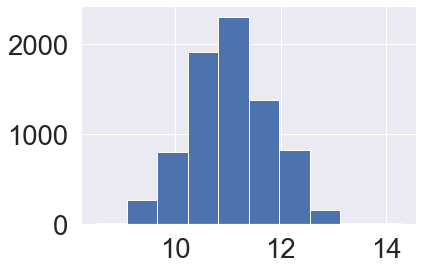

In [77]:
# price에 log(1+y값)을 취한 값 리턴하는 함수 호출해 price 컬럼에 대입한다.
df_train["PRICE"]=np.log1p(df_train["PRICE"])
plt.hist(df_train["PRICE"])

# 데이터 전처리

### 1. 새로운 컬럼 추가

### 2. 범주형 데이터 처리

### 3. 컬럼 삭제

# 분류 with Decision Tree

# 예측하기